# VNS

### Algoritmo
El algoritmo VNS que consideraremos se compone de los siguientes pasos:  

1. Generar la solución actual aleatoria Sacty hacer k =1, bl =0  
2. Si (k >kmax) hacer k =1.  
3. Generar una soluciónvecina (Svec) de Sactcon el operador de generación devecino para el valor del parámetro k, Svec=Nk(Sact).  
4. Aplicar la BúsquedaLocal sobre la soluciónSvec, obteniendo S’. Hacer bl = bl + 1.
5. Si S’es mejor que Sact, hacer Sact=S’y k =1. Si no, hacer k =k + 1.
6. Si (bl < blmax) volver a 2. Si no, devolver Sacty terminar.  

El  operador  de  generación  de  vecinohará  uso  de  nuevo  de  la Sublista  Aleatoria  de Tamaño Fijoanteriormente descrita para el algoritmo ILS (aunque en aquel caso, se usó para implementar el operador de mutación).
4

### Valores de los Parámetros

El algoritmo de búsqueda local se aplicarácincuenta veces (blmax= 50). Setrabajarácon kmax= 5, es decir, cinco entornos diferentes.El valor de s (tamañode la sublista) en el operador de generación de vecinodefinirá el tamañodel movimiento según el valor de k. Iráaumentándosede lasiguiente forma:
- k = 1: Se aplica un tamañode s = n/8.
- k = 2: Se aplica un tamañode s = n/7.
- k = 3: Se aplica untamañode s = n/6.
- k = 4: Se aplica un tamañode s = n/5.
- k = 5: Se aplica un tamañode s = n/4.

En resumen, para k se aplica el operador de vecino sublista aleatoria con s =n=(9-k).


---
## Librerías
- pandas: necesaria para la representación de resultados.
- datetime: necesaria para la obtención de una semilla inicial que genere las demás semillas.
- ipynb: necesaria para la carga de algoritmos de otros ficheros.

In [1]:
import pandas as pd
from datetime import datetime
from ipynb.fs.full.algorithm import * # Importación del algoritmo VNS
from ipynb.fs.full.auxiliary_functions import * # Importación de funciones auxiliares para la carga y representación de datos

---
## Dataframe
Creación del dataframe que almacenará las estadísticas de cada ejecución.

In [2]:
mux = pd.MultiIndex.from_product([["St70","Ch130","A280"], ['S. ini',"S. opt","Mej. S.",'#Ev',"T(seg)"]])
estadisticas = pd.DataFrame(
    columns=mux,
    index = ["It "+str(indice) for indice in range(1,51)] + ["Media", "Des. tip.","Sum"]
)

---
## Lectura de ficheros y ejecución del algoritmo
Para poder ejecutar correctamente el algoritmo de forma concurrente en Jupyter, este debe ser cargado de forma externa. Para ello se ha usado la librería ipynb.

In [3]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")

### Generación de la semilla

In [4]:
semillas = []
dt = datetime.now()
semilla = random.randint(0,dt.microsecond)
print("Semilla: ",semilla)

Semilla:  755468


#### st70

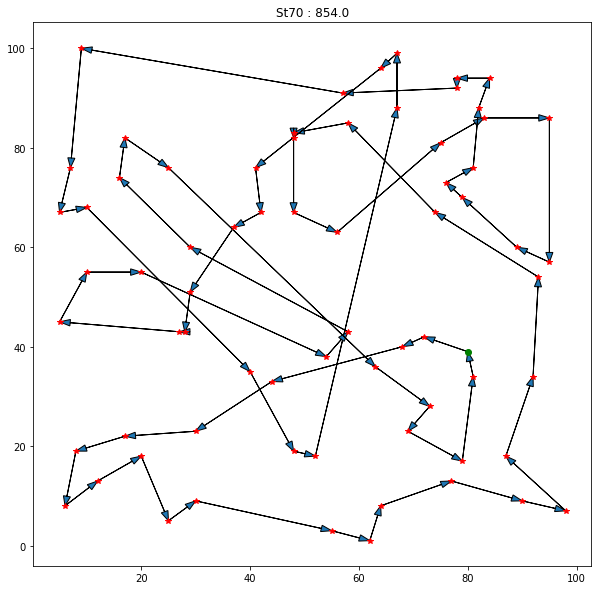

In [5]:
solucion_st70, coste_st70, estadisticas_st70 = vns(50,semilla,st70)
representacion(solucion_st70, "St70", coste_st70)
agregar_resultados(estadisticas,"St70",estadisticas_st70)

#### ch130


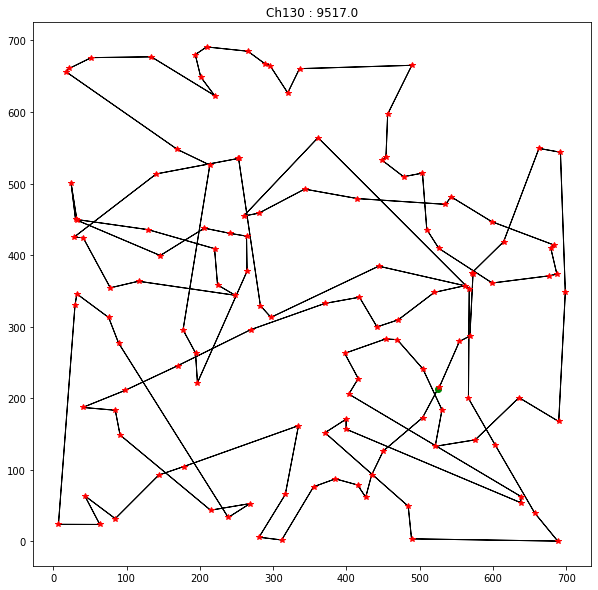

In [6]:
solucion_ch130, coste_ch130, estadisticas_ch130 = vns(50,semilla,ch130)
representacion(solucion_ch130, "Ch130", coste_ch130)
agregar_resultados(estadisticas,"Ch130",estadisticas_ch130)

#### a280

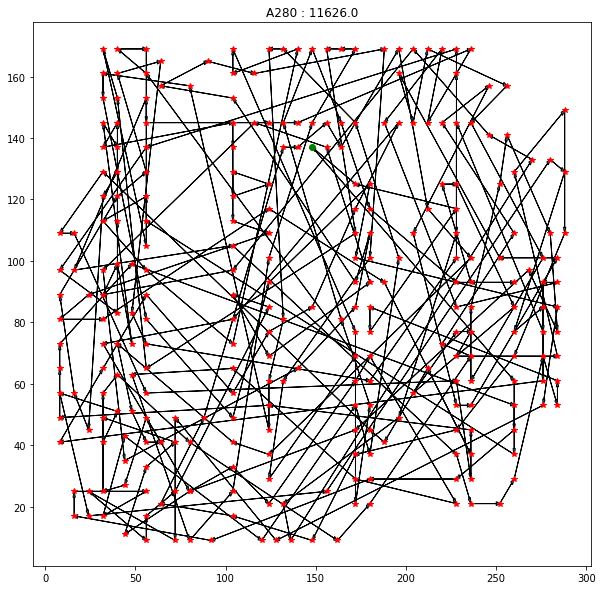

In [7]:
solucion_a280, coste_a280, estadisticas_a280 = vns(50,semilla,a280)
representacion(solucion_a280, "A280", coste_a280)
agregar_resultados(estadisticas,"A280",estadisticas_a280)

---
# Estadísticas

In [8]:
estadisticas

St70                                       Ch130           \
           S. ini   S. opt Mej. S.       #Ev T(seg)    S. ini   S. opt   
It 1       3415.0   1179.0  1179.0    112001    0.3   43026.0  22848.0   
It 2       1328.0   1096.0  1096.0     50716   0.13   26472.0  18135.0   
It 3       1380.0   1097.0  1096.0     16906   0.04   19495.0  15543.0   
It 4       1331.0   1059.0  1059.0     43471   0.11   17708.0  13245.0   
It 5       1245.0   1054.0  1054.0     14491   0.04   16497.0  12786.0   
It 6       1431.0   1006.0  1006.0     36226   0.09   15665.0  11876.0   
It 7       1187.0   1009.0  1006.0     19321   0.05   15999.0  11510.0   
It 8       1258.0   1008.0  1006.0     26566   0.07   14043.0  10935.0   
It 9       1253.0    999.0   999.0     31396   0.09   13517.0  10546.0   
It 10      1323.0    997.0   997.0     24151   0.07   13463.0   9979.0   
It 11      1284.0    997.0   997.0     31396   0.08   13506.0   9862.0   
It 12      1262.0    997.0   997.0     26566   0.07   12595.0   9679.0   
It 13      1189.0   1056.0   997.0     14491   0.04    9679.0   9623.0   
It 14      1359.0   1036.0   997.0     24151   0.06   11294.0   9748.0   
It 15      1786.0   1046.0   997.0     41056   0.11   12382.0  10125.0   
It 16      1240.0   1091.0   997.0     14491   0.05   15347.0  10819.0   
It 17      1284.0   1115.0   997.0     19321   0.05   18914.0  12742.0   
It 18      1531.0   1110.0   997.0     31396   0.08   17214.0  12545.0   
It 19      1568.0   1108.0   997.0     26566    0.1   13281.0  11831.0   
It 20      1749.0   1085.0   997.0     57961   0.15   16777.0  11832.0   
It 21      1255.0   1085.0   997.0     28981   0.08   15352.0  11811.0   
It 22      1342.0   1112.0   997.0     16906   0.05   11811.0  11737.0   
It 23      1367.0   1187.0   997.0     14491   0.04   11874.0  11737.0   
It 24      1738.0   1061.0   997.0     57961   0.16   15360.0  11495.0   
It 25      1976.0   1076.0   997.0     55546   0.15   14084.0  11667.0   
It 26      1227.0   1112.0   997.0     21736   0.05   16867.0  11732.0   
It 27      1336.0   1112.0   997.0     24151   0.06   17684.0  11481.0   
It 28      1180.0   1112.0   997.0      9661   0.03   19750.0  12189.0   
It 29      1501.0   1114.0   997.0     45886   0.12   15144.0  12227.0   
It 30      1636.0   1144.0   997.0     48301   0.12   13936.0  12099.0   
It 31      1308.0   1129.0   997.0     16906   0.05   16049.0  11788.0   
It 32      1479.0   1124.0   997.0     48301   0.13   16717.0  11829.0   
It 33      1496.0   1063.0   997.0     24151   0.06   18539.0  12183.0   
It 34      1506.0   1061.0   997.0     31396   0.08   15474.0  12045.0   
It 35      1449.0   1069.0   997.0     43471   0.11   15657.0  12256.0   
It 36      1219.0   1034.0   997.0     31396    0.1   18242.0  11453.0   
It 37      1034.0   1034.0   997.0      2416   0.01   12220.0  11060.0   
It 38      1372.0    899.0   899.0     65206   0.19   17982.0  11136.0   
It 39      1101.0    920.0   899.0     26566   0.09   15110.0  10658.0   
It 40      1126.0    896.0   896.0     24151   0.06   14557.0  10612.0   
It 41      1070.0    921.0   896.0     21736   0.06   13834.0  10429.0   
It 42      1137.0    873.0   873.0     16906   0.04   12257.0  10172.0   
It 43       969.0    854.0   854.0     16906   0.05   19484.0  11407.0   
It 44       983.0    930.0   854.0     16906   0.05   13294.0  10239.0   
It 45       930.0    930.0   854.0      2416   0.01   16086.0   9965.0   
It 46      1345.0    999.0   854.0     26566   0.08   10156.0   9517.0   
It 47      1279.0   1051.0   854.0     43471   0.12   11781.0   9594.0   
It 48      1235.0   1050.0   854.0      9661   0.02   14342.0   9769.0   
It 49      1247.0   1050.0   854.0     21736   0.06   13231.0   9644.0   
It 50      1254.0   1066.0   854.0     16906   0.04   16906.0   9800.0   
Media      1370.0  1044.26  974.24   29868.6   0.08  15813.08  11598.8   
Des. tip.  361.83    77.41   71.82  18855.48   0.05   4903.53  2229.71   
Sum             -

In [9]:
estadisticas.to_csv("Resultados.csv")

In [1]:
costes_candidatos = [4,2,1]
        
costes_invertidos = [ 1/coste for coste in costes_candidatos]
total = sum(costes_invertidos)
        
probabilidades = [coste/total for coste in costes_invertidos]
print(probabilidades)

[0.14285714285714285, 0.2857142857142857, 0.5714285714285714]
